**😰 Stress Detection from Social Media Articles** (Classification of stress from social media articles from Reddit and Twitter)

https://www.kaggle.com/datasets/mexwell/stress-detection-from-social-media-articles

a) more accurate and efficient NLP-based approach to automatically detect stress in social media text, potentially enabling early intervention and improved mental health support.


---
**Dataset overview**

We construct four high quality datasets using the text articles from Reddit and Twitter. Against each of the articles is a class label with a value of '0' or '1', where '0' specifies a Stress Negative article and '1' specifies a Stress Positive article. Annotation was done using an automated DNN-based strategy highlighted in the aforementioned study.

**The description about each of the datasets is given as under:**

**Reddit Title:** Consists of titles from the articles collected from both stress and non-stress related subreddits from Reddit.

**Reddit Combi:** Consists of title and body text combined together to form a single text sequence, collected from both stress and non-stress related subreddits from Reddit.

**Twitter Full:**Consists of stress and non-stress related tweets, collected from Twitter.

**Twitter Non-Advert:** Consists of the denoised version of the Twitter Full dataset.


---

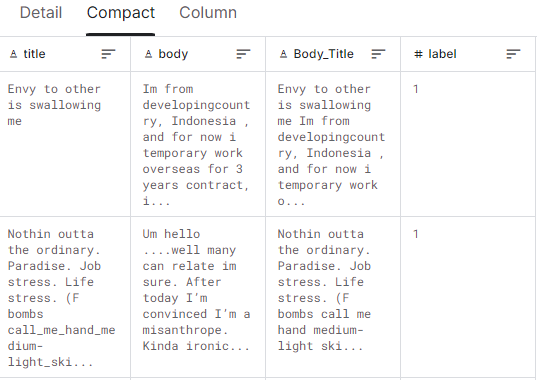



In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

import re
import pickle
import streamlit as st

In [3]:
# Load datasets from Excel files
df_reddit_combi = pd.read_excel('../data/Reddit_Combi.xlsx')
df_reddit_title = pd.read_excel('../data/Reddit_Title.xlsx')
df_twitter_full = pd.read_excel('../data/Twitter_Full.xlsx')
df_twitter_non_ad = pd.read_excel('../data/Twitter_Non-Advert.xlsx')

In [4]:
# Explore data (number of rows and column names for each DataFrame)
print(df_reddit_combi.shape[0])
print(df_reddit_title.shape[0])
print(df_twitter_full.shape[0])
print(df_twitter_non_ad.shape[0])

print(df_reddit_combi.columns)
print(df_reddit_title.columns)
print(df_twitter_full.columns)
print(df_twitter_non_ad.columns)

3123
5556
8900
2051
Index(['title', 'body', 'Body_Title', 'label'], dtype='object')
Index(['title', 'label'], dtype='object')
Index(['text', 'hashtags', 'labels'], dtype='object')
Index(['text', 'label'], dtype='object')


In [5]:
# View the first few rows of each DataFrame to get a sense of the data

In [6]:
df_reddit_combi.head()

,title,body,Body_Title,label
0,Envy to other is swallowing me,"Im from developingcountry, Indonesia , and for...",Envy to other is swallowing me Im from develop...,1
1,Nothin outta the ordinary. Paradise. Job stres...,Um hello ....well many can relate im sure. Aft...,Nothin outta the ordinary. Paradise. Job stres...,1
2,Almost 49 and the chasm of emptiness has never...,I’ve been diagnosed severe bi polar where you ...,Almost 49 and the chasm of emptiness has never...,1
3,I’m happy again,"After my closest friend left me in April, I ha...",I’m happy again After my closest friend left m...,0
4,Is it possible to recover from such a traumati...,"I am only 15, and yet I feel my life is alread...",Is it possible to recover from such a traumati...,1


In [7]:
df_reddit_title.head()

,title,label
0,My aunt and uncle scoring their first gig as p...,0
1,How do I stop stressing about work when I'm at...,1
2,Meeting a fellow suicidal student in middle sc...,1
3,My brain feels literally numb. Is this depress...,1
4,A mother's reaction after seeing her son has p...,0


In [8]:
df_twitter_full.head()

,text,hashtags,labels
0,Being s mom is cleaning 24/7 the same shit ove...,"['momlife', 'kids', 'tired']",1
1,And now we have been given the walkthru book b...,['walkthru'],0
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,"['Peace', 'Joy', 'Love', 'JoyTrain', 'MentalHe...",0
3,speak-no-evil monkey Can I Be Honest With You...,"['therapy', 'help', 'NLP', 'CBT', 'hypnotherap...",1
4,Psy Do u hv any regrets? Me No Psy Are you hap...,[],0


In [9]:
df_twitter_non_ad.head()

,text,label
0,speak-no-evil monkey Can I Be Honest With You...,1
1,Frau Goebbels early signs of psychosis psychot...,1
2,A lot of work and unfulfilled tasks plunge you...,1
3,Private health insurance delivers value for yo...,1
4,XpertOnline offers you the convenience of view...,1


In [10]:
print(df_reddit_combi.info())
print(df_reddit_title.info())
print(df_twitter_full.info())
print(df_twitter_non_ad.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       3123 non-null   object
 1   body        3116 non-null   object
 2   Body_Title  3123 non-null   object
 3   label       3123 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 97.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5556 entries, 0 to 5555
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5556 non-null   object
 1   label   5556 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 86.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8900 entries, 0 to 8899
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      8900 non-null   object
 1   hashtags  8892 non-null   object
 2   labels    8900 non-null   int

In [11]:
# Check for missing values
print(df_reddit_combi.isnull().sum())
print(df_reddit_title.isnull().sum())
print(df_twitter_full.isnull().sum())
print(df_twitter_non_ad.isnull().sum())

title         0
body          7
Body_Title    0
label         0
dtype: int64
title    0
label    0
dtype: int64
text        0
hashtags    8
labels      0
dtype: int64
text     0
label    0
dtype: int64


In [12]:
# Handle missing values
df_reddit_combi.dropna(inplace = True)
df_twitter_full.dropna(inplace = True)

In [13]:
# Check for missing values after dropping rows
print(df_reddit_combi.isnull().sum())
print(df_reddit_title.isnull().sum())
print(df_twitter_full.isnull().sum())
print(df_twitter_non_ad.isnull().sum())

title         0
body          0
Body_Title    0
label         0
dtype: int64
title    0
label    0
dtype: int64
text        0
hashtags    0
labels      0
dtype: int64
text     0
label    0
dtype: int64


In [14]:
# Preprocess Reddit combi data: Drop title and body columns, rename Body_Title to title
df_reddit_combi = df_reddit_combi.drop(['title', 'body'], axis = 1)
df_reddit_combi = df_reddit_combi.rename(columns = {'Body_Title':'title'})
df_reddit_combi['Source'] = 'Reddit'

In [15]:
df_reddit_title['Source'] = 'Reddit'

In [16]:
# Preprocess Twitter full data: Clean hashtags using regular expressions, rename columns
# sample hashtags = ['momlife', 'kids', 'tired']	
import re

def clean_hashtag (hashtags):
    clean_hashtag = re.sub(r'[\[\]\']', '', hashtags)

    return clean_hashtag

df_twitter_full['hashtags'] = df_twitter_full['hashtags'].apply(clean_hashtag)

df_twitter_full = df_twitter_full.rename(columns = {'labels' : 'label'})
df_twitter_full = df_twitter_full.rename(columns = {'text':'title'})
df_twitter_full['title'] = df_twitter_full['hashtags'] + ' ' + df_twitter_full['title']
df_twitter_full = df_twitter_full.drop(['hashtags'], axis = 1)
df_twitter_full['Source'] = 'Twitter'

In [17]:
df_twitter_full.head()

,title,label,Source
0,"momlife, kids, tired Being s mom is cleaning 2...",1,Twitter
1,walkthru And now we have been given the walkth...,0,Twitter
2,"Peace, Joy, Love, JoyTrain, MentalHealth, Quot...",0,Twitter
3,"therapy, help, NLP, CBT, hypnotherapy, mentalh...",1,Twitter
4,Psy Do u hv any regrets? Me No Psy Are you ha...,0,Twitter


In [18]:
df_twitter_non_ad = df_twitter_non_ad.rename(columns = {'text':'title'})
df_twitter_non_ad['Source'] = 'Twitter'

In [19]:
# Verify column names after preprocessing
print(df_reddit_combi.columns)
print(df_reddit_title.columns)
print(df_twitter_full.columns)
print(df_twitter_non_ad.columns)

Index(['title', 'label', 'Source'], dtype='object')
Index(['title', 'label', 'Source'], dtype='object')
Index(['title', 'label', 'Source'], dtype='object')
Index(['title', 'label', 'Source'], dtype='object')


In [20]:
# Concatenate all preprocessed DataFrames into a single DataFrame
df = pd.concat([df_reddit_combi, df_reddit_title, df_twitter_full, df_twitter_non_ad], ignore_index = True)
df.head()

,title,label,Source
0,Envy to other is swallowing me Im from develop...,1,Reddit
1,Nothin outta the ordinary. Paradise. Job stres...,1,Reddit
2,Almost 49 and the chasm of emptiness has never...,1,Reddit
3,I’m happy again After my closest friend left m...,0,Reddit
4,Is it possible to recover from such a traumati...,1,Reddit


In [21]:
df.shape

(19615, 3)

In [22]:
# Check for empty strings or spaces
blank = []

for i, ttl, lbl, src in df.itertuples():
    if ttl.isspace():
        blank.append(i)

In [23]:
# No empty strings or spaces found 
print(blank)

[]


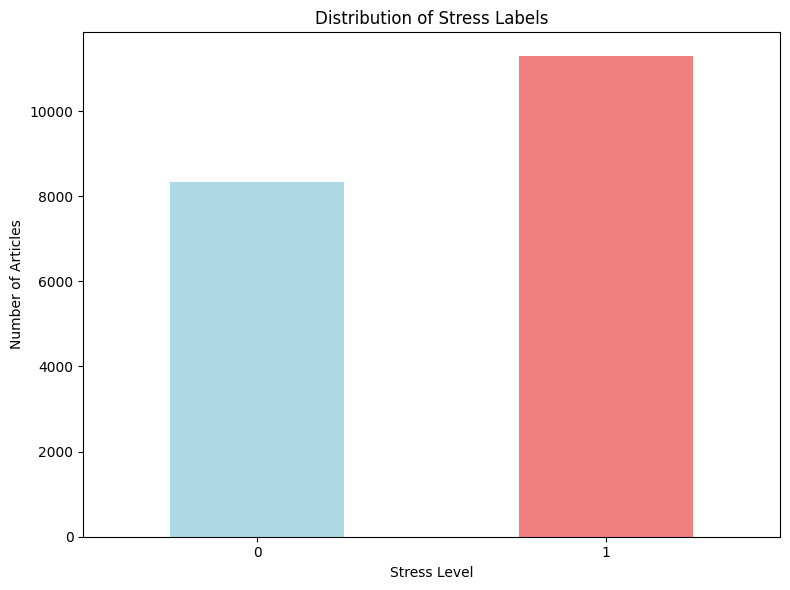

In [24]:
#Dataset Distribution (Bar Chart):
stress_counts = df.groupby('label')['label'].count()

plt.figure(figsize=(8, 6))
stress_counts.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title("Distribution of Stress Labels")
plt.xlabel("Stress Level")
plt.ylabel("Number of Articles")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

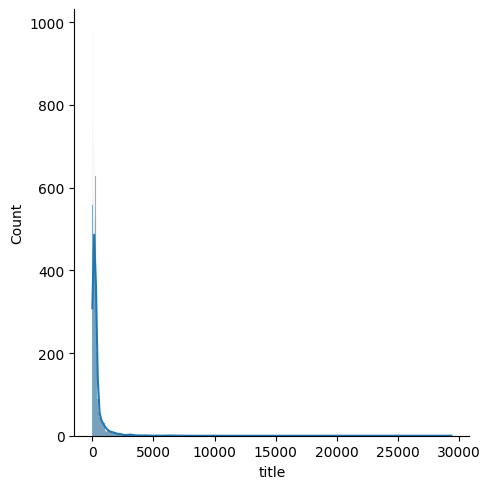

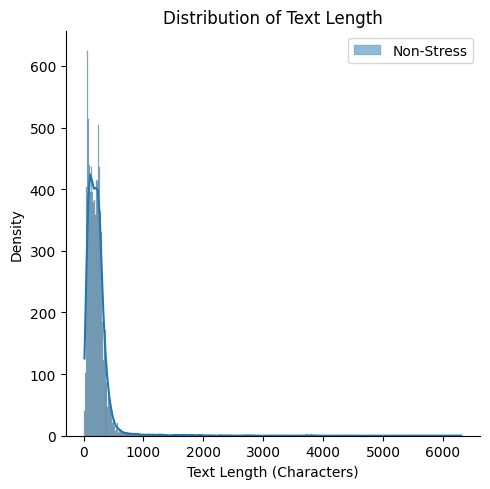

In [25]:
#Text Length Distribution (Histogram):
stress_articles = df[df['label'] == 1]
non_stress_articles = df[df['label'] == 0]

sns.displot(stress_articles['title'].str.len(), label='Stress', kde=True)
sns.displot(non_stress_articles['title'].str.len(), label='Non-Stress', kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length (Characters)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

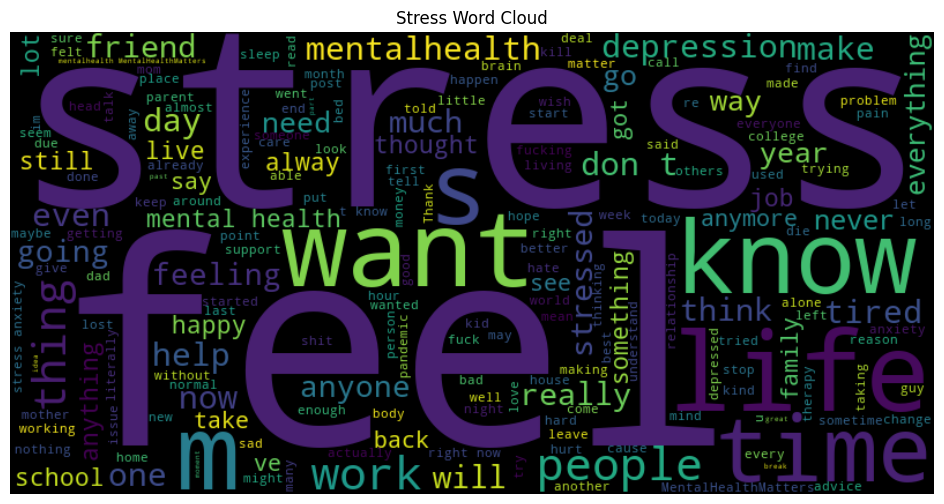

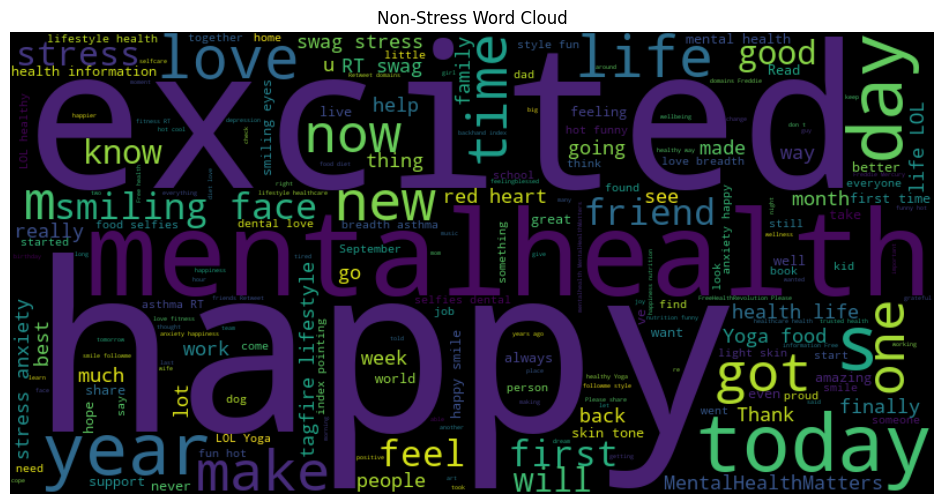

In [26]:
#Word Clouds:
def generate_wordcloud(text_data, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42).generate(text_data)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

stress_text = " ".join(stress_articles['title'])
non_stress_text = " ".join(non_stress_articles['title'])

generate_wordcloud(stress_text, "Stress Word Cloud")
generate_wordcloud(non_stress_text, "Non-Stress Word Cloud")

In [27]:
# Split data into features (title) and target (stress)
X = df['title']
y = df['label']

# Split data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

In [28]:
# Create a pipeline that combines TF-IDF vectorization and LinearSVC classification
pipeline = Pipeline([('tfidf', TfidfVectorizer(lowercase=False)), ('clf', LinearSVC())])

In [29]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

C:\Users\jimmy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer(lowercase=False)),
                ('clf', LinearSVC())])

In [30]:
# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

In [31]:
y_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [32]:
# Evaluate the model's performance
print(accuracy_score(y_test, y_pred))

0.886821310221769


In [33]:
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[1424  247]
 [ 197 2055]]


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1671
           1       0.89      0.91      0.90      2252

    accuracy                           0.89      3923
   macro avg       0.89      0.88      0.88      3923
weighted avg       0.89      0.89      0.89      3923



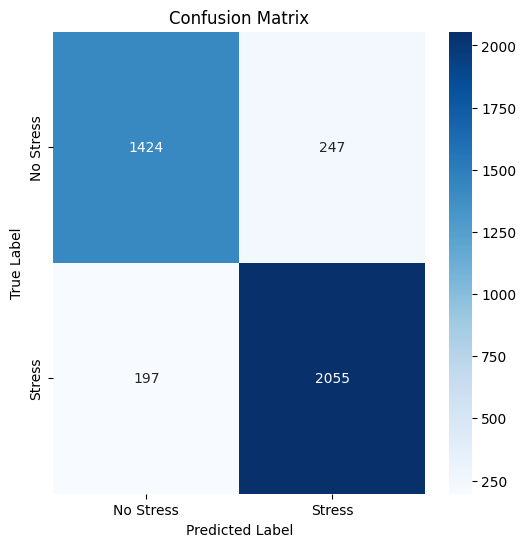

In [35]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',xticklabels=['No Stress', 'Stress'], yticklabels=['No Stress', 'Stress'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [36]:
#'0' specifies a Stress Negative article and '1' specifies a Stress Positive article
# Sample
output = pipeline.predict(['The weight of the world seems to be crushing down on me. Every task feels like a mountain to climb, and I can barely keep my head above water. The constant barrage of demands and responsibilities is overwhelming, and I’m starting to feel like I’m losing my grip on everything. My mind is racing, my body is exhausted, and I can’t seem to find any peace or quiet. I’m at my breaking point, and I just need a moment to breathe and regroup.'])

In [37]:
# Sample
#output = pipeline.predict(["The weight of the world seems to be crushing down on me."])

In [38]:
if output == 0:
    print('The text does not indicate high stress levels.')
else:
    print('The text indicates high stress levels.')

The text indicates high stress levels.


In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Attention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import tensorflow as tf
from tensorflow.keras.layers import Flatten

In [40]:
X = df['title']
y = df['label']

# Preprocess text data
# This block prepares the text data for the model by converting text to sequences of numbers and padding sequences to a uniform length.
tokenizer = Tokenizer(num_words=5000) # Create a tokenizer to map words to numbers
tokenizer.fit_on_texts(X)  # Fit the tokenizer on the training data

sequences = tokenizer.texts_to_sequences(X) # Convert text to sequences of numbers
padded_sequences = pad_sequences(sequences, maxlen=100) # Pad sequences to a max length

In [41]:
# Get vocabulary size (number of unique words)
vocab_size = len(tokenizer.word_index) + 1

# Define model parameters
embedding_dim = 128  # Embedding dimension for word representation
lstm_units = 64  # Number of units in the LSTM layer

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Define the model architecture (a sequential model with Embedding, LSTM, and Dense layers)
model = tf.keras.Sequential([
    Embedding(vocab_size, embedding_dim),
    LSTM(lstm_units, return_sequences=False), # LSTM layer with return_sequences=True for multiple outputs
    Flatten(),
    Dense(1, activation='sigmoid') # Output layer with sigmoid activation for binary classification
])

#print(y_train.shape)
#print(y_val.shape) 
#print(model.summary())

# Compile the model (specifies loss function, optimizer, and metrics)
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the test set and calculate AUC-ROC score
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)


Epoch 1/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.7580 - loss: 0.4822 - val_accuracy: 0.8745 - val_loss: 0.3273
Epoch 2/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9044 - loss: 0.2489 - val_accuracy: 0.8611 - val_loss: 0.3450
Epoch 3/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9390 - loss: 0.1707 - val_accuracy: 0.8707 - val_loss: 0.3341
Epoch 4/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9534 - loss: 0.1358 - val_accuracy: 0.8790 - val_loss: 0.3543
Epoch 5/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9725 - loss: 0.0917 - val_accuracy: 0.8732 - val_loss: 0.3941
Epoch 6/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9762 - loss: 0.0741 - val_accuracy: 0.8822 - val_loss: 0.4217
Epoch 7/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9812 - loss: 0.0601 - val_accuracy: 0.8803 - val_loss: 0.4840
Epoch 8/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9823 - loss: 0.0508 - val_acc

In [42]:
from sklearn.metrics import roc_auc_score

# Plot ROC curve
auc = roc_auc_score(y_test, y_pred[:, 0])  # Assuming stress probability is at index 0
print(f"AUC-ROC Score: {auc}")

AUC-ROC Score: 0.9361843930469944


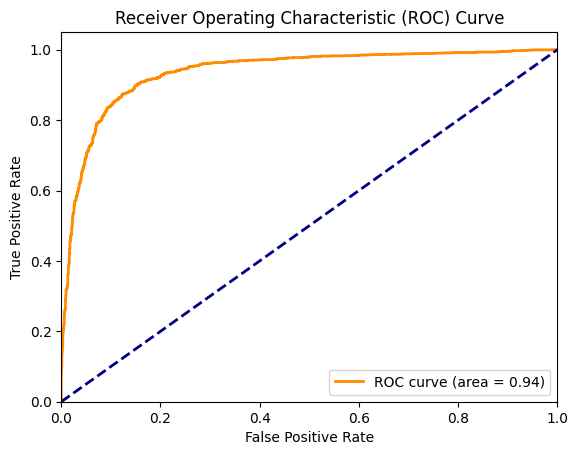

In [43]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 0])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [44]:
new_text = "feeling happy."
new_sequence = tokenizer.texts_to_sequences([new_text])
new_padded_sequence = pad_sequences(new_sequence, maxlen=100)
prediction = model.predict(new_padded_sequence)
stress_level = (prediction > 0.5).astype(int)[0][0]

if stress_level == 1:
  print("The text indicates high stress levels.")
else:
  print("The text does not indicate high stress levels.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
The text does not indicate high stress levels.


In [46]:
# Save the trained model 
import builtins
with builtins.open('Stress_Detection_LSTM_App.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [47]:
# Save the tokenizer
tokenizer_json = tokenizer.to_json()

with open('tokenizer.json', 'w') as f:
    f.write(tokenizer_json)